# Machine Learning Final Lab [CAC 3]
<hr/>

**Submitted by:-** <br>

Name: **Naveen N S** <br>
Register Number: **20112045** <br>
Class: **4BSCDS** <br> 
<hr/>

# Lab Overview
-------------------------------
- Finding out a Dataset, and comparing at least two different algorithms and choose the best one
- Using suitable Data Preprocessing and Feature Selection/Engineering Methods
- Fine tuning the model and hyper parameters and Finalising the Model
- Making the model deployment-ready by giving User-Input provision

# About the Dataset
--------------------------
**THIS DATASET CONTAINS DATA COLLECTED DURING AN AIRLINE PASSENGER SATISFACTION SURVEY.**

-----------------

**FEATURES:**

- Gender: Gender of the passengers (Female, Male)
- Customer Type: The customer type (Loyal customer, disloyal customer)
- Age: The actual age of the passengers
- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
- Flight distance: The flight distance of this journey
- Departure Delay in Minutes: Minutes delayed when departure
- Arrival Delay in Minutes: Minutes delayed when Arrival

*(0:Not Applicable;1-5)*

- Inflight wifi service: Satisfaction level of the inflight wifi service 
- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
- Ease of Online booking: Satisfaction level of online booking
- Gate location: Satisfaction level of Gate location
- Food and drink: Satisfaction level of Food and drink
- Online boarding: Satisfaction level of online boarding
- Seat comfort: Satisfaction level of Seat comfort
- Inflight entertainment: Satisfaction level of inflight entertainment
- On-board service: Satisfaction level of On-board service
- Leg room service: Satisfaction level of Leg room service
- Baggage handling: Satisfaction level of baggage handling
- Check-in service: Satisfaction level of Check-in service
- Inflight service: Satisfaction level of inflight service
- Cleanliness: Satisfaction level of Cleanliness


**TARGET**
- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

# Approach
------------------------------
- Importing necessary libraries
- Performing data pre-processing
- Performing EDA and understanding the data
- Encoding categorical features for easy computation
- Performing train_test_split
- Applying Logistic Regression, KMeans, KNN and Random Forest algorithms on the data
- Evaluating performace of each model using accuracy score and classification report
- Implementing User-Input based prediction of the target variable using model with best performance

IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import Matrix

import warnings
warnings.filterwarnings("ignore")

LOADING DATASET

In [108]:
data = pd.read_csv("airline_satisfaction.csv")
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


SHAPE OF THE DATASET

In [3]:
print("Number of rows:",data.shape[0])
print("-"*50)
print("Number of columns:",data.shape[1])


Number of rows: 129880
--------------------------------------------------
Number of columns: 24


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

# Data Pre-processing and EDA
-----------------------

DROPPING FEW UNNECESSARY COLUMNS

In [5]:
data.drop('id',inplace=True,axis=1)
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


GETTING SEPARATE LIST OF CATEGORICAL AND NUMERICAL VARIABLES

In [6]:
#getting separate list of categorical and numerical variables

numeric_columns = list(data.select_dtypes(include=np.number).columns)
categorical_columns = list(data.select_dtypes(include="object").columns)

CATEGORICAL DATA DESCRIPTION

In [7]:
data.describe(include="object").round(2).T

,count,unique,top,freq
Gender,129880,2,Female,65899
Customer Type,129880,2,Loyal Customer,106100
Type of Travel,129880,2,Business travel,89693
Class,129880,3,Business,62160
satisfaction,129880,2,neutral or dissatisfied,73452


GETTING UNIQUE ENTRIES OF ALL CATEGORICAL VALUES

In [8]:
for i in categorical_columns:
    print(i,': ')
    for j in data[i].unique():
        print('\t',j)
    print("-"*50)

Gender : 
	 Male
	 Female
--------------------------------------------------
Customer Type : 
	 Loyal Customer
	 disloyal Customer
--------------------------------------------------
Type of Travel : 
	 Personal Travel
	 Business travel
--------------------------------------------------
Class : 
	 Eco Plus
	 Business
	 Eco
--------------------------------------------------
satisfaction : 
	 neutral or dissatisfied
	 satisfied
--------------------------------------------------


FINDING MISSING VALUES (IF ANY)

In [9]:
data.isna().sum()

# Arrival Delay in Minutes has missing values

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

REPLACING THE NULL VALUES OF *Arrival Delay in Minutes* WITH ITS MODE

In [10]:
data["Arrival Delay in Minutes"].fillna(data["Arrival Delay in Minutes"].mode()[0],inplace=True)

#verifying that null values got replaced by mode
data["Arrival Delay in Minutes"].isna().sum()

0

SINCE MOST OF OUR FEATURES ARE ORDINAL CATEGORICAL DATA, WE NEED TO CHANGE THEIR DATATYPE FROM NUMERIC TO CATEGORICAL

In [11]:
# only these features are actual numeric data
num_col=["Age","Departure Delay in Minutes" ,"Arrival Delay in Minutes","Flight Distance"]

# rest all are actually categorical
cat_col=[x for x in data.columns if x not in num_col]

# converting all ordinal features to categorical features
data[cat_col]=data[cat_col].astype("category")



#verifying the change
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             129880 non-null  category
 1   Customer Type                      129880 non-null  category
 2   Age                                129880 non-null  int64   
 3   Type of Travel                     129880 non-null  category
 4   Class                              129880 non-null  category
 5   Flight Distance                    129880 non-null  int64   
 6   Inflight wifi service              129880 non-null  category
 7   Departure/Arrival time convenient  129880 non-null  category
 8   Ease of Online booking             129880 non-null  category
 9   Gate location                      129880 non-null  category
 10  Food and drink                     129880 non-null  category
 11  Online boarding           

**VISUALIZATION**

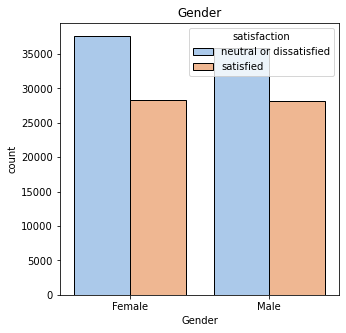

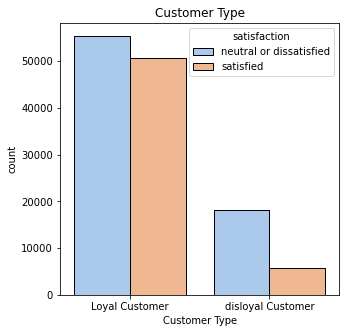

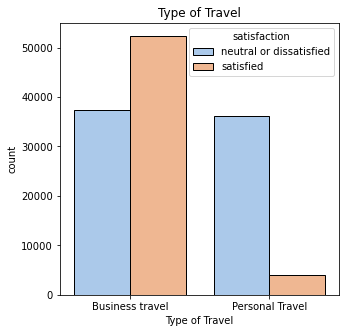

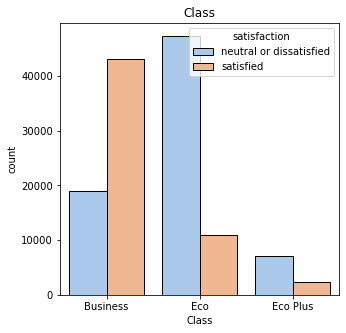

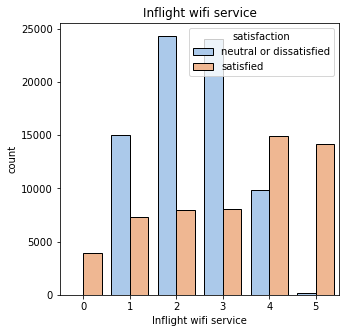

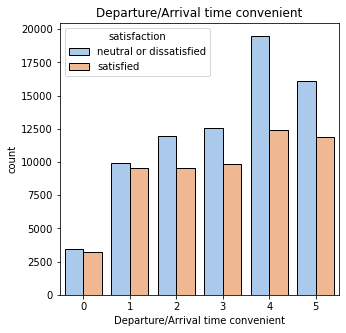

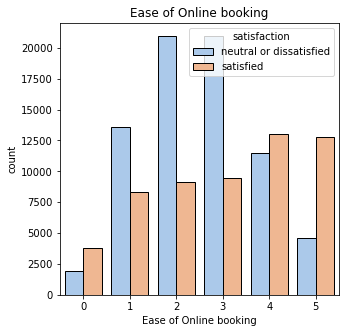

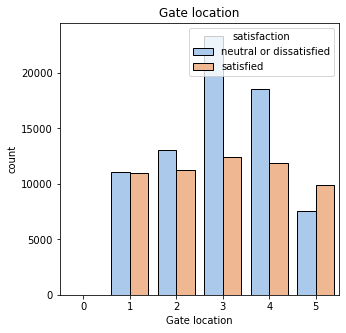

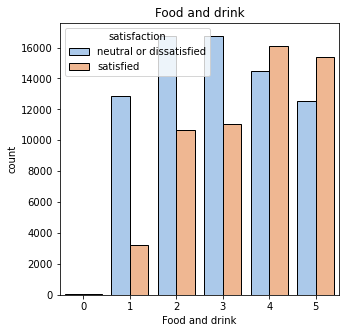

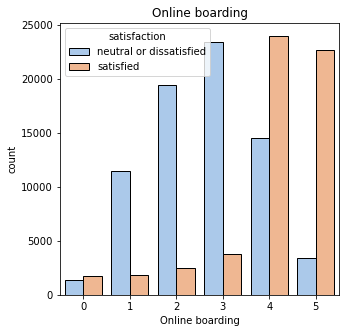

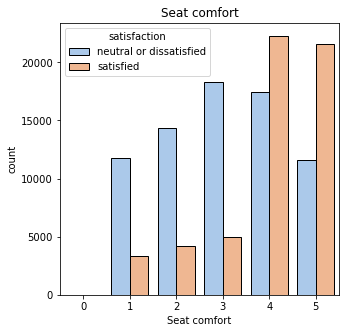

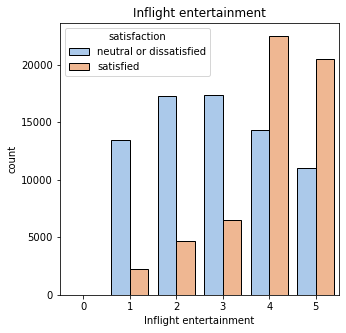

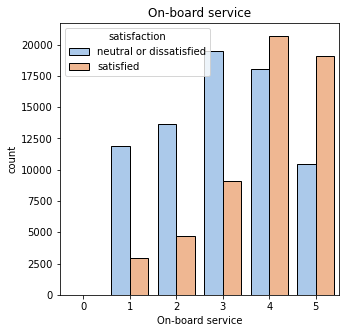

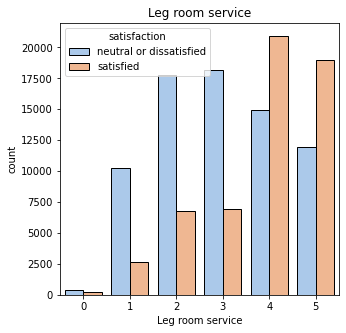

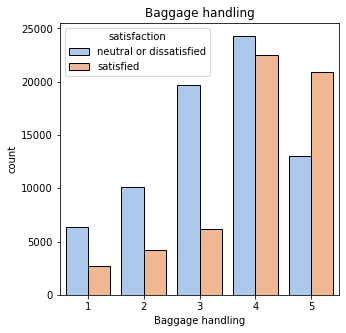

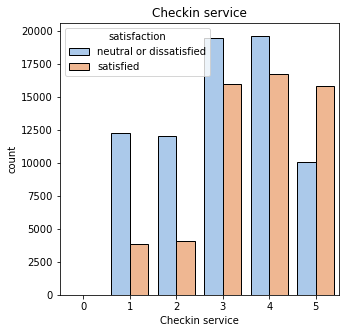

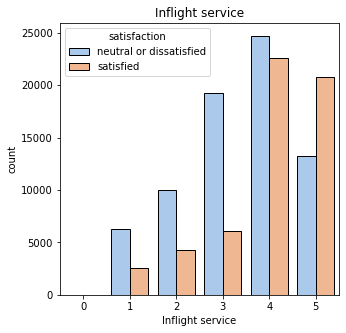

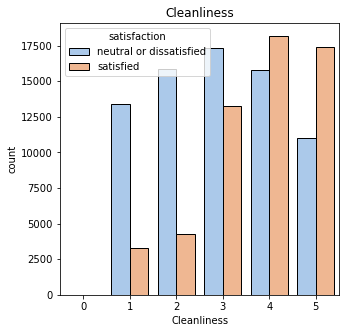

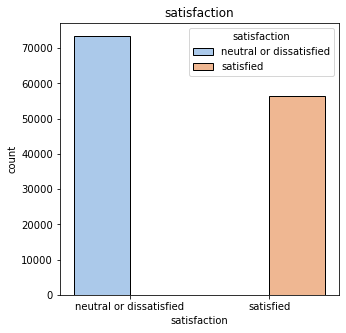

In [12]:
#countplot for all categorical varibables with satisfaction as hue

for i in cat_col:
    plt.figure(figsize=(5,5))
    sns.countplot(x=i, data=data[cat_col], hue="satisfaction",palette="pastel",edgecolor = "black")
    plt.title(i)

**CATPLOT SHOWING DISTRIBUTION OF SATISFACTION BASED ON PASSENGER AGE**

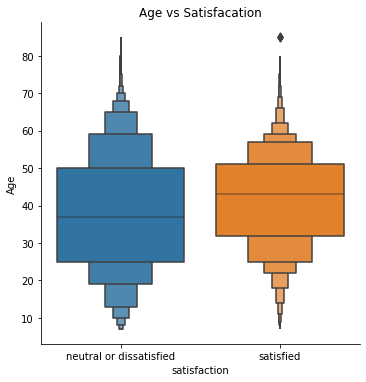

In [116]:
sns.catplot(x="satisfaction", y="Age", kind="boxen",
            data=data.sort_values("satisfaction")).set(title ="Age vs Satisfacation");

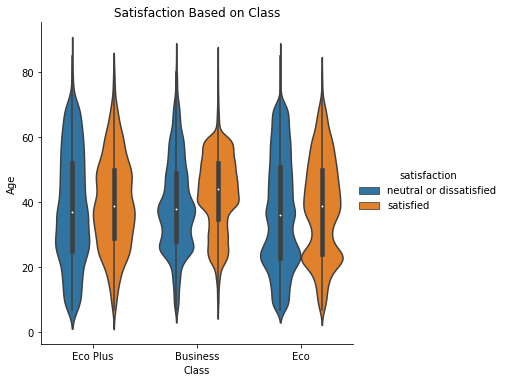

In [117]:
sns.catplot(y="Age", x="Class", hue="satisfaction",
            kind="violin", data=data).set(title ="Satisfaction Based on Class");

**PIE CHARTS SHOWING DISTRIBUTIONS OF RATING BASED ON ALL CATEGORICAL VARIABLES**

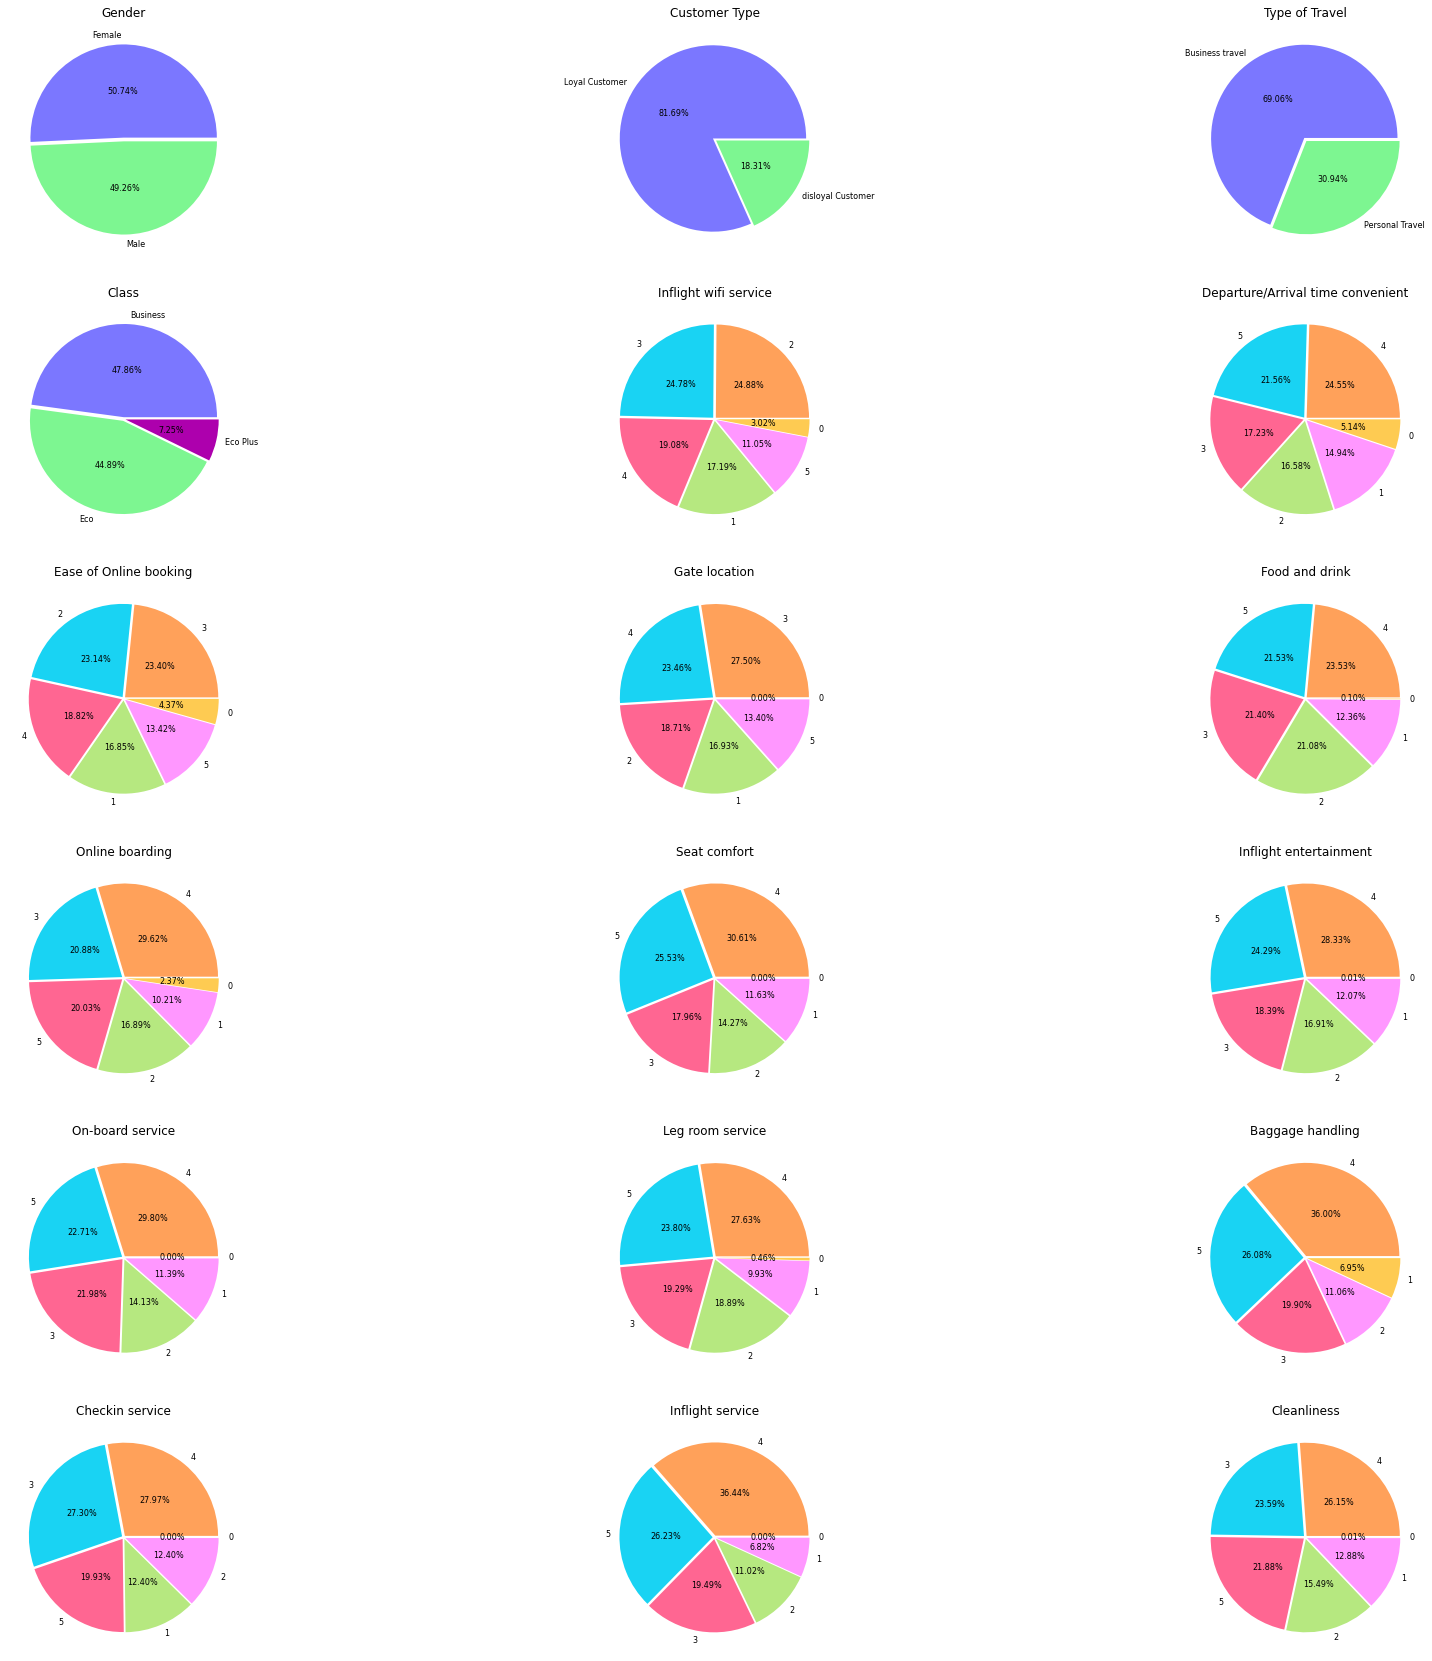

In [13]:
labels=[]
pie, ax = plt.subplots(6,3,figsize=[30,30])

for i,col in enumerate(cat_col):
    #pie, ax = plt.subplots(5,4,figsize=[15,10])
    if col=="satisfaction":
        continue;
    xc=pd.DataFrame(data[col].value_counts())

    
    labels = data[col].unique()
    if len(labels)==3:
        colors = ['#7b77ff', '#7df691',"#ad00ad"]
        r=[0.02]*3
    if len(labels)==2:
        colors = ['#7b77ff', '#7df691'] 
        r=[0.02]*2
    if len(labels)==6:
        colors = ['#FFA15A','#19D3F3','#FF6692','#B6E880','#FF97FF','#FECB52']
        r=[0.02]*6
    if len(labels)==5:
        colors = ['#FFA15A','#19D3F3','#FF6692','#FF97FF','#FECB52']
        r=[0.02]*5
        
        

    ax[i//3, i%3].pie(x = data[col].value_counts(),autopct='%.2f%%',
    explode=r, labels=xc.index, pctdistance=0.5, textprops={'fontsize': 8}, colors = colors)
    plt.title(f'{i}  distribution',)
    ax[i//3, i%3].set_title(col)

plt.show()

**CORRELATION AMONG NUMERICAL VARIABLES**

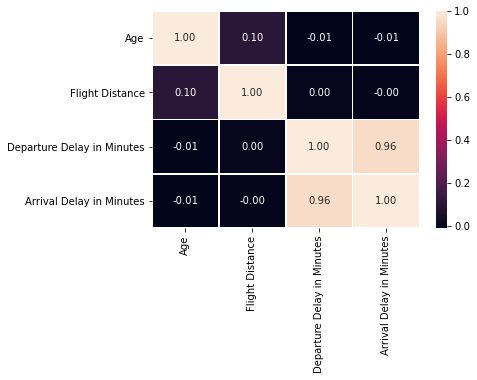

In [14]:
sns.heatmap(data.corr(),annot=True,fmt=".2f",linewidths=.8)
plt.show()

*There is strong correlation between arrival delay and departure time delay*

**LABEL ENCODING**

In [122]:
from sklearn.preprocessing import LabelEncoder

for i in cat_col:
    lo=LabelEncoder()
    data[i]=  lo.fit_transform(data[i])
    
data.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,1,0,13,1,2,460,3,4,3,...,5,4,3,3,4,5,5,25,18.0,0
1,5047,1,1,25,0,0,235,3,2,3,...,1,1,5,2,1,4,1,1,6.0,0
2,110028,0,0,26,0,0,1142,2,2,2,...,5,4,3,3,4,4,5,0,0.0,1
3,24026,0,0,25,0,0,562,2,5,5,...,2,2,5,2,1,4,2,11,9.0,0
4,119299,1,0,61,0,0,214,3,3,3,...,3,3,4,3,3,3,3,0,0.0,1


# Appling Few ML models and choosing the best one for prediction
---------------------------------

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

DIVIDING DATASET INTO FEATURES AND TARGET

In [17]:
X=data.drop(["satisfaction"],axis=1)
y=data[["satisfaction"]]

print("-"*70)
print("FEATURES".center(70))
print("-"*70)
print(X.head())


print("-"*70)
print("TARGET".center(70))
print("-"*70)
print(y)


----------------------------------------------------------------------
                               FEATURES                               
----------------------------------------------------------------------
   Gender  Customer Type  Age  Type of Travel  Class  Flight Distance  \
0       1              0   13               1      2              460   
1       1              1   25               0      0              235   
2       0              0   26               0      0             1142   
3       0              0   25               0      0              562   
4       1              0   61               0      0              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3         

SPLITTING THE DATASET INTO TRAINING AND TESTING SET

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Logistic Regression

In [121]:
model = LogisticRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("-"*70)
print("Accuracy with Logistic Regression: {} %".format(accuracy_score(y_test,y_pred)*100))
print("-"*70)

print("CONFUSION MATRIX".center(70))
print("-"*70)
Matrix(confusion_matrix(y_test, y_pred))

----------------------------------------------------------------------
Accuracy with Logistic Regression: 77.08654142285187 %
----------------------------------------------------------------------
                           CONFUSION MATRIX                           
----------------------------------------------------------------------


Matrix([
[14379,  3957],
[ 3483, 10651]])

## KMeans

**Using Elbow method to determine k value (Number of clusters)**

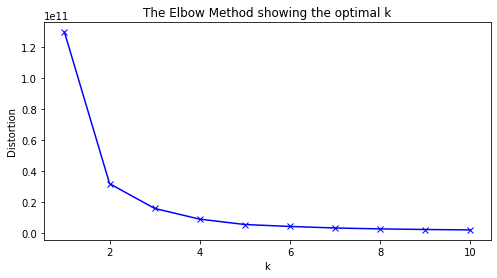

In [46]:
distortions = []

for k in range(1,11):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1,11), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

**Thus, optimum k-value is 2**

In [89]:
kmeans = KMeans(2)
kmeans.fit(X)

identified_clusters = kmeans.fit_predict(X)
identified_clusters


score = accuracy_score(y_test,kmeans.predict(X_test))
print("-"*70)
print("Accuracy with KMeans Clustering: {} %".format(score*100))
print("-"*70)

print("CONFUSION MATRIX".center(70))
print("-"*70)
Matrix(confusion_matrix(y_test, kmeans.predict(X_test)))

----------------------------------------------------------------------
Accuracy with KMeans Clustering: 34.000615953187555 %
----------------------------------------------------------------------
                           CONFUSION MATRIX                           
----------------------------------------------------------------------


Matrix([
[2828, 15452],
[5978,  8212]])

In [91]:
print("-"*70)
print('CLASSIFICATION REPORT FOR KMeans'.center(70))
print("-"*70)
print(classification_report(y_test,kmeans.predict(X_test)))

----------------------------------------------------------------------
                   CLASSIFICATION REPORT FOR KMeans                   
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.32      0.15      0.21     18280
           1       0.35      0.58      0.43     14190

    accuracy                           0.34     32470
   macro avg       0.33      0.37      0.32     32470
weighted avg       0.33      0.34      0.31     32470



# KNN

STANDARDISING THE DATASET

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
scaled_features = scaler.transform(X)

df_feat = pd.DataFrame(scaled_features, columns = data.columns[:-1])
df_feat.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.014878,-0.473422,-1.747961,1.493951,2.262940,-0.732184,0.204090,0.617265,0.173445,-1.546267,...,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,1.153946,1.304487,0.270187,0.076909
1,1.014878,2.112281,-0.954274,-0.669366,-0.955724,-0.957760,0.204090,-0.692719,0.173445,0.018048,...,-1.850520,-1.767616,-1.851475,1.252898,-0.535681,-1.821437,0.304086,-1.740402,-0.360214,-0.235460
2,-0.985340,-0.473422,-0.888133,-0.669366,-0.955724,-0.048440,-0.548166,-0.692719,-0.539957,-0.764109,...,1.181428,1.230787,0.479357,-0.266574,0.311762,0.547894,0.304086,1.304487,-0.386481,-0.391644
3,-0.985340,-0.473422,-0.954274,-0.669366,-0.955724,-0.629924,-0.548166,1.272257,1.600249,1.582364,...,-1.092533,-1.018015,-1.074531,1.252898,-0.535681,-1.821437,0.304086,-0.979180,-0.097547,-0.157368
4,1.014878,-0.473422,1.426788,-0.669366,-0.955724,-0.978814,0.204090,-0.037727,0.173445,0.018048,...,1.181428,-0.268414,-0.297587,0.493162,0.311762,-0.241883,-0.545774,-0.217958,-0.386481,-0.391644


APPLYING KNN ALGORITHM AND GETTING THE CLASSIFICATION REPORT

In [124]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(df_feat, y)

knn = KNeighborsClassifier(n_neighbors = 2)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
from sklearn.metrics import classification_report, confusion_matrix

print("-"*70)
print("Accuracy with KNearest Neighbors Classifier: {} %".format(accuracy_score(y_test, pred)*100))
print("-"*70)

print("CONFUSION MATRIX".center(70))
print("-"*70)
Matrix(confusion_matrix(y_test, pred))

----------------------------------------------------------------------
Accuracy with KNearest Neighbors Classifier: 91.3920542038805 %
----------------------------------------------------------------------
                           CONFUSION MATRIX                           
----------------------------------------------------------------------


Matrix([
[17880,   355],
[ 2440, 11795]])

In [125]:
print("-"*70)
print('CLASSIFICATION REPORT FOR KNN'.center(70))
print("-"*70)
print(classification_report(y_test,pred))

----------------------------------------------------------------------
                    CLASSIFICATION REPORT FOR KNN                     
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     18235
           1       0.97      0.83      0.89     14235

    accuracy                           0.91     32470
   macro avg       0.93      0.90      0.91     32470
weighted avg       0.92      0.91      0.91     32470



# Random Forest 

In [93]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestClassifier

# create regressor object
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

# Make predictions for the test set
y_pred_test = forest.predict(X_test)

# View accuracy score
print("-"*70)
print("Accuracy with Random Forest Classifier: {} %".format(accuracy_score(y_test, y_pred_test)*100))
print("-"*70)


# View confusion matrix for test data and predictions
print("CONFUSION MATRIX".center(70))
print("-"*70)
Matrix(confusion_matrix(y_test, y_pred_test))

----------------------------------------------------------------------
Accuracy with Random Forest Classifier: 96.47058823529412 %
----------------------------------------------------------------------
                           CONFUSION MATRIX                           
----------------------------------------------------------------------


Matrix([
[18022,   359],
[  787, 13302]])

In [94]:
print("-"*70)
print('CLASSIFICATION REPORT FOR RANDOM FOREST'.center(70))
print("-"*70)
print(classification_report(y_test, y_pred_test))

----------------------------------------------------------------------
               CLASSIFICATION REPORT FOR RANDOM FOREST                
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     18381
           1       0.97      0.94      0.96     14089

    accuracy                           0.96     32470
   macro avg       0.97      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



### Inference:
------------------
**We got highest accuracy with Random Forest and least accuracy with KMeans Clustering**

*Thus, we will be proceeding for user-input provision using Random Forest Algorithm*

## User-Input Provision to predict airline satisfaction of passenger (Using Random Forest)
-------------------------------

In [119]:
pred_data = pd.DataFrame()

print("*"*50)
print("PREDICTING SATISFACTION OF AIRLINE PASSENGER".center(50))
print("*"*50)

print()

# taking inputs of normal categorical data
pred_data['Gender'] = [int(input('[1] for Male and [0] for female \nEnter your Gender: '))]
print("-"*50)

pred_data['Customer Type'] = [int(input('[0] for Loyal customer and [1] for disloyal customer   \nCustomer Type: '))]
print("-"*50)

pred_data['Age '] = [int(input('Enter your age: '))]
print("-"*50)

pred_data['Type of Travel  '] = [int(input('[1] for personal travel and [0] for business travel \nEnter Travel Type: '))]
print("-"*50)

pred_data['Class'] = [int(input('[0] for Business [1] Eco [2] Eco-plus \nEnter Class of travel: '))]
print("-"*50)

pred_data['Flight Distance'] = [int(input('Enter Flight Distance: '))]
print("-"*50)

pred_data['Departure Delay in Minutes'] = [int(input('Enter Departure Delay in minutes: '))]
print("-"*50)

pred_data['Arrival Delay in Minutes'] = [int(input('Enter Arrival Delay in minutes: '))]
print("-"*50)


# taking ordinal data as input

print()
print("-"*50)
print("RATE THE FOLLOWING INPUTS IN THE SCALE OF 0-5: \n 0 --> Least Satisfied \n 5 --> Most Satisfied")
print("-"*50)

pred_data['Inflight wifi service'] = [int(input('Rate Inflight Wifi Service: '))]
print("-"*50)

pred_data['Departure/Arrival time convenient'] = [int(input('Rate Dept/Arr Time Conveience: '))]
print("-"*50)

pred_data['Ease of Online booking'] = [int(input('Rate Ease in Online Booking: '))]
print("-"*50)

pred_data['Gate location'] = [int(input('Rate Ease of finding Gate Location: '))]
print("-"*50)

pred_data['Food and drink'] = [int(input('Rate Food and Drink: '))]
print("-"*50)

pred_data['Online boarding'] = [int(input('Rate Online Boarding Conveience: '))]
print("-"*50)

pred_data['Seat comfort'] = [int(input('Rate Seat Comfort: '))]
print("-"*50)

pred_data['Inflight entertainment'] = [int(input('Rate Inflight Entertainment: '))]
print("-"*50)

pred_data['On-board service'] = [int(input('Rate On-board Service: '))]
print("-"*50)

pred_data['Leg room service'] = [int(input('Rate Leg Room: '))]
print("-"*50)

pred_data['Baggage handling'] = [int(input('Rate Baggage Handling: '))]
print("-"*50)

pred_data['Checkin service'] = [int(input('Rate Check-In Service: '))]
print("-"*50)

pred_data['Inflight service'] = [int(input('Rate Inflight Service: '))]
print("-"*50)

pred_data['Cleanliness'] = [int(input('Rate Cleanliness: '))]


# here forest is the RandomForestClassifier()
y_pred = forest.predict(pred_data)
pred_data['satisfaction'] = y_pred

print("_"*50)
print("RESULT".center(50))
print("_"*50)
print()

if pred_data['satisfaction'][0] == 1:
    print("PASSSENGER IS SATISFIED WITH THE AIRLINE")
if pred_data['satisfaction'][0] == 0:
    print("PASSSENGER IS NOT SATISFIED WITH THE AIRLINE")
print("_"*50)


**************************************************
   PREDICTING SATISFACTION OF AIRLINE PASSENGER   
**************************************************

[1] for Male and [0] for female 
Enter your Gender: 1
--------------------------------------------------
[0] for Loyal customer and [1] for disloyal customer   
Customer Type: 0
--------------------------------------------------
Enter your age: 36
--------------------------------------------------
[1] for personal travel and [0] for business travel 
Enter Travel Type: 1
--------------------------------------------------
[0] for Business [1] Eco [2] Eco-plus 
Enter Class of travel: 2
--------------------------------------------------
Enter Flight Distance: 235
--------------------------------------------------
Enter Departure Delay in minutes: 25
--------------------------------------------------
Enter Arrival Delay in minutes: 10
--------------------------------------------------

--------------------------------------------------
RAT

# References
------------------------
- https://seaborn.pydata.org/tutorial/categorical.html
- https://www.geeksforgeeks.org/k-means-clustering-introduction/
- https://www.geeksforgeeks.org/random-forest-regression-in-python/
- https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
- https://www.geeksforgeeks.org/k-nearest-neighbor-algorithm-in-python/
- https://machinelearningmastery.com/how-to-connect-model-input-data-with-predictions-for-machine-learning/

# Conclusion
----------------------------------
- Applied Logistic Regression/KMeans/KNN/Random Forest alogithms and compared them based on accuracy and classification reprot.

- Random Forest had highest accuracy of around 96%

- Implemented User-Input based prediction. Based on User input, predicted whether the user (passenger) is satisfied with the airline or not